# convolution-kernels

This is a Python package that implements kernels/filters convolutions for time series modeling. Kernels
are defined as different linear combinations of basis functions with coefficients. Convolutions
are implemented using PyTorch so we can use its automatic differentiation capabilities to learn the kernel coefficients.

### Use case 1. Smoothing with built-in kernels

torch.Size([20])


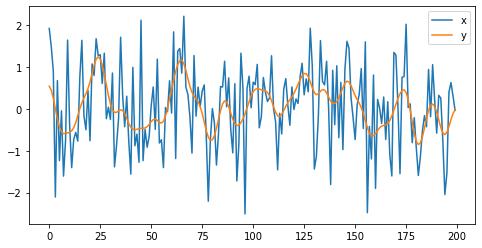

In [1]:
import matplotlib.pyplot as plt
import torch

from kernel.fun import KernelFun

torch.manual_seed(42)

%load_ext autoreload
%autoreload 2

sigma = torch.tensor([2.])
weight = torch.tensor([1.])
ker = KernelFun.gaussian(sigma=sigma, weight=weight)

t = torch.arange(0, 200, 1)
x = torch.randn(len(t))
y = ker(x)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t, x.numpy(), label='x')
ax.plot(t, y.detach().numpy(), label='y')
ax.legend();

### Use case 2. Define a custom basis and fit the kernel to data

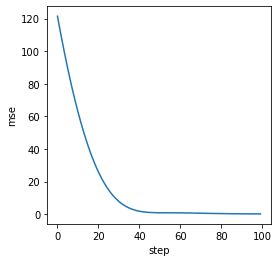

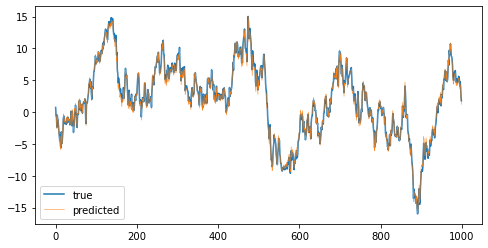

In [2]:
from kernel.base import Kernel

# Load data
x, y_true = torch.load('data.pt')

# Define exponential basis with two timescales (10 and 100)
tau = torch.tensor([10, 100]).unsqueeze(0)
support_arange = torch.arange(0, 500, 1).unsqueeze(1)
basis = torch.exp(-support_arange / tau)
ker = Kernel(basis=basis)

# Define PyTorch optimizer and minimize mean squared error
optim = torch.optim.Adam(ker.parameters(), lr=5e-2)
ms_errors = []
for i in range(100):
    optim.zero_grad()
    y = ker(x)
    mse = torch.mean((y - y_true)**2)
    mse.backward()
    optim.step()
    ms_errors.append(mse.item())
    
# Predict output
y_pred = ker(x).detach()

# Loss
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(ms_errors)
ax.set_xlabel('step'); ax.set_ylabel('mse')

# Predicted output
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(y_true.numpy(), label='true')
ax.plot(y_pred.numpy(), lw=0.5, label='predicted')
ax.legend();